# **IA353 - Redes Neurais: EFC1 - Questão 1**
## **Síntese de Modelos Lineares para Classificação de Padrões**

**Professor:** Fernando J. Von Zuben.

**Aluno(a)**: Guilherme Rosa

### **1. Importações**

In [ ]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist

### **2. Definição de funções**

In [2]:
def categorical_to_onehot(vec):
    lin, col = vec.shape[0], 10
    Y = np.zeros((lin, col))

    for i in range(lin):
        Y[i, vec[i]] = 1
    
    return Y

In [3]:
def onehot_to_categorical(Y):
    vec = [np.argmax(Y[i]) for i in range(Y.shape[0])]
    vec = np.array(vec)
    
    return vec

In [4]:
def plot_digit_images(X, Y_categorical, titlesText, Nimgs=5):
    fig = plt.figure(figsize=(15,4))
    i = rn.randint(0, X.shape[0])

    for index, (image, label) in enumerate(zip(X[i:i+Nimgs], Y_categorical[i:i+Nimgs])):
        plt.subplot(1, Nimgs, index + 1)
        X_image = np.reshape(image, (28, 28))
        plt.imshow(X_image, cmap='gray')
        plt.axis('off')
        plt.title(titlesText + f'{label}\n', fontsize = 12)

In [5]:
def train_valid_split(X, y, random_state=42, valid_size=0.2):
    X_data, y_data = X.copy(), y.copy()
    train_len = int((1-valid_size)*X_data.shape[0])

    np.random.seed(random_state)
    np.random.shuffle([X_data, y_data])

    X_train, y = X_data[:train_len], y_data[:train_len]
    X_valid, yv = X_data[train_len:], y_data[train_len:]

    return X_train.copy(), y.copy(), X_valid.copy(), yv.copy()

In [6]:
def confusion_matrix(true_labels, predict_labels, num_classes):

    M = np.zeros((num_classes, num_classes))

    for k in range(true_labels.shape[0]):
        i, j = predict_labels[k], true_labels[k]
        M[i, j]+=1
    
    M = M.astype('int32')
    return M

### **3. Download da base de dados MNIST**

  - A base de dados MNIST é constituída pelos conjuntos de treinamento e teste. O primeiro conjunto possui 60.000 amostras de imagens de dígitos manuscritos, enquanto que o segundo conjunto possui 10.000 amostras.
  - As amostras da base MNIST, quando baixadas utilizando a API do Keras, apresentam as seguintes características:
    - As entradas estão no formato (28, 28, 1), isto é, uma matriz quadrada com cada pixel no intervalo [0, 255].
    - As saídas (rótulos) estão na representação categórica.
  - Após o download, os pixels das amostras de entrada passam por um processo de normalização, sendo divididos por 255, de modo que seus valores fiquem no intervalo [0, 1].
  - Nesta atividade, a normalização é necessária para que o mapeamento a ser aproximado pelo classificador linear seja mais suave, facilitando o processo de treinamento (i. e., a obtenção dos parâmetros do modelo).
  - Após a normalização: 
    - As amostras de entrada tem seus formatos alterados para (784,), pois a entrada do classificador linear é um vetor.
    - As saídas são convertidas para a codificação one-hot, pois a saída do classificador linear é um vetor em que cada elemento representa uma das classes do problema.

- Download e normalização dos dados:


In [7]:
(X_train, y), (X_test, yt) = mnist.load_data()

print('Valores máximo e mínimo antes da normalização:')
print(f'  X_train.max: {X_train.max()}')
print(f'  X_train.min: {X_train.min()}')

X_train, X_test = X_train/255., X_test/255.
print('Valores máximo e mínimo após a normalização:')
print(f'  X_train.max: {X_train.max()}')
print(f'  X_train.min: {X_train.min()}')

11493376/11490434 [==============================] - 0s 0us/step
Valores máximo e mínimo antes da normalização:
  X_train.max: 255
  X_train.min: 0
Valores máximo e mínimo após a normalização:
  X_train.max: 1.0
  X_train.min: 0.0


- Dados com formato adequado para o treinamento:

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
y_train = categorical_to_onehot(y)
X_test = np.reshape(X_test, (X_test.shape[0], -1))
y_test = categorical_to_onehot(yt)

In [9]:
print('Dados de treinamento:')
print(f'  Dimensão de X_train: {X_train.shape}')
print(f'  Dimensão de y_train: {y_train.shape}')
print('------------------------------------')
print('Dados de teste:')
print(f'  Dimensão de X_test: {X_test.shape}')
print(f'  Dimensão de y_test: {y_test.shape}')

Dados de treinamento:
  Dimensão de X_train: (60000, 784)
  Dimensão de y_train: (60000, 10)
------------------------------------
Dados de teste:
  Dimensão de X_test: (10000, 784)
  Dimensão de y_test: (10000, 10)


- Exemplo de amostras de treinamento e teste:

In [10]:
n1 = rn.randint(0, y_train.shape[0])

print('Exemplo do conjunto de treinamento:')
print(f'Saída na representação categórica: {y_train[n1]}')
print(f'Saída na representação one-hot: {y[n1]}')

print('--------------------------------------------------------------')
n1 = rn.randint(0, y_test.shape[0])

print('Exemplo do conjunto de teste:')
print(f'Saída na representação categórica: {y_test[n1]}')
print(f'Saída na representação one-hot: {yt[n1]}')

Exemplo do conjunto de treinamento:
Saída na representação categórica: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Saída na representação one-hot: 8
--------------------------------------------------------------
Exemplo do conjunto de teste:
Saída na representação categórica: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Saída na representação one-hot: 7


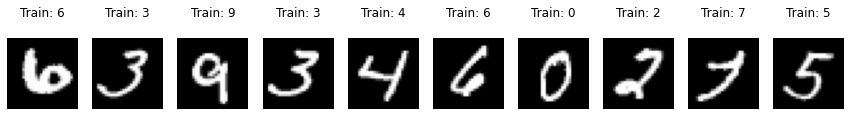

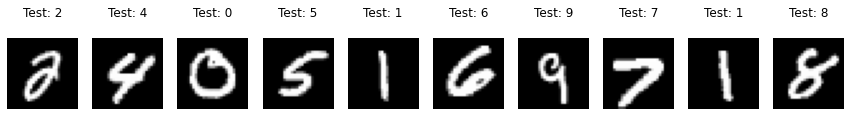

In [11]:
plot_digit_images(X_train, y, titlesText='Train: ', Nimgs=10);
plot_digit_images(X_train, y, titlesText='Test: ', Nimgs=10);

### **4. Separação das amostras de treinamento em amostras de treinamento e validação**

- Com relação aos dados, a última etapa de pré-processamento consiste na separação das amostras de treinamento nos conjuntos de treinamento e validação.
- A técnica utilizada na atividade é chamada holdout, em que uma parcela das amostras de treinamento são utilizadas apenas para validação do modelo.
- O conjunto de treinamento é formado por 80% das 60.000 amostras, que são utilizadas diretamente para a obtenção dos parâmetros do classificador.
- O conjunto de validação é formado pelos restantes 20% das amostras que são utilizadas para validar ou verificar o desempenho do classificador obtido junto aos dados de treinamento.
- A ideia da validação cruzada consiste em analisar o erro do modelo junto aos dados de validação de modo que, quanto menor o erro de validação, maior a capacidade de generalização do modelo.

In [12]:
X_train, y, X_valid, yv = train_valid_split(X_train, y)
y_train = categorical_to_onehot(y)
y_valid = categorical_to_onehot(yv)

In [13]:
print('Dados de treinamento:')
print(f'  Dimensão da matriz X_train: {X_train.shape}')
print(f'  Dimensão da matriz Y_train: {y_train.shape}')
print('--------------------------------------')
print('Dados de validação:')
print(f'  Dimensão da matriz X_valid: {X_valid.shape}')
print(f'  Dimensão da matriz Y_valid: {y_valid.shape}')

Dados de treinamento:
  Dimensão da matriz X_train: (48000, 784)
  Dimensão da matriz Y_train: (48000, 10)
--------------------------------------
Dados de validação:
  Dimensão da matriz X_valid: (12000, 784)
  Dimensão da matriz Y_valid: (12000, 10)


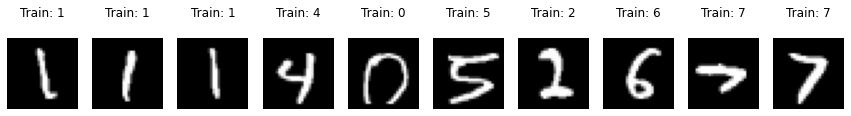

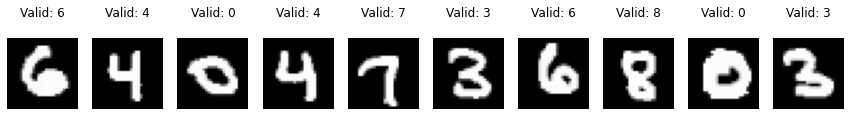

In [14]:
plot_digit_images(X_train, y, titlesText='Train: ', Nimgs=10);
plot_digit_images(X_valid, yv, titlesText='Valid: ', Nimgs=10);

### **5. Classificador linear e métricas de treinamento**

In [15]:
class LinearClassifier():
    
    def __init__(self, X_train, Y_train):
        self.Xt = X_train
        self.Yt = Y_train
        [self.Nt, self.K] = X_train.shape
        self.Phi_t = np.insert(self.Xt, 0, np.ones([1, self.Nt]), axis=1)
        self.Im = np.insert(np.insert(np.eye(self.K), 0, np.zeros([1, self.K]), axis=0), 0, np.zeros([1, self.K+1]), axis=1)
        self.W = None
    
    def fit(self, coef_reg):
        self.W = np.linalg.inv(np.transpose(self.Phi_t).dot(self.Phi_t) + coef_reg*self.Im).dot(np.transpose(self.Phi_t).dot(self.Yt))

    def evaluate(self, X_valid, Y_valid):
        Phi_v = np.insert(X_valid, 0, np.ones([1, X_valid.shape[0]]), axis=1)
        Y_valid = Phi_v.dot(self.W)
        Y_valid_onehot = LinearClassifier.to_onehot(self, Y_valid)
        return Y_valid, Y_valid_onehot

    def predict(self, X_pred, Y_pred):
        Phi_p = np.insert(X_pred, 0, np.ones([1, X_pred.shape[0]]), axis=1)
        Y_pred = Phi_p.dot(self.W)
        Y_pred_onehot = LinearClassifier.to_onehot(self, Y_pred)
        return Y_pred, Y_pred_onehot
        
    def to_onehot(self, Y_est):
        Yest_onehot = Y_est.copy()
        for i in range(0, Yest_onehot.shape[0]):   
            np.place(Yest_onehot[i], Yest_onehot[i] < np.max(Yest_onehot[i]), 0)
            np.place(Yest_onehot[i], Yest_onehot[i] == np.max(Yest_onehot[i]), 1)
        return Yest_onehot

In [16]:
class Metrics():
    
    def __init__(self, Y, Yest, Yest_onehot):
        self.Y = Y
        self.Yest = Yest
        self.Yest_onehot = Yest_onehot    
        self.MSE = None
        self.CE = None
    
    def meansquared_error(self):
        e = (self.Y - self.Yest)**2
        self.MSE = np.sum(np.sum(e, axis=1), axis=0) # / (N*L), onde [N, L] = self.Yval.shape
        return self.MSE
    
    def classification_error(self):
        matches = []
        
        for i in range(0, self.Y.shape[0]):
            matches.append(np.array_equal(self.Y[i], self.Yest_onehot[i]))
        
        score = matches.count(True)
        err = self.Y.shape[0] - score
        self.CE = err/(err + score)
        return self.CE

### **6. Busca inicial pelos melhores coeficientes de regularização**

- Inicialmente será feita uma busca pelos coeficientes de regularização $\lambda$, entre os valores abaixo, que levem aos menores valores de erro quadrático médio e taxa de erro de classificação junto aos dados de validação. 

$$ A = \{2^{-10},\; 2^{-8}, \ldots,\; 2^{0},\; 2^{+2},\ldots,\; 2^{+20} \}$$


- Instância da classe LinearClassifier:

In [17]:
classifier = LinearClassifier(X_train, y_train)

coef_best_MSE = []
coef_best_CE = []

- Treinamento e validação dos classificadores:

In [ ]:
coefs = [2**n for n in range(-10, 21, 2)]

ms_errors = np.array([]) # Armazena o erro quadrático médio para cada coeficiente de regularização
ce_errors = np.array([]) # Armazena o erro de classificação para cada coeficiente de regularização

for coef in coefs:
    classifier.fit(coef) # treinamento
    Y_est_valid, Y_est_valid_onehot = classifier.evaluate(X_valid, y_valid) # validação
    
    desempenho = Metrics(y_valid, Y_est_valid, Y_est_valid_onehot)
    
    ms_errors = np.append(ms_errors, desempenho.meansquared_error())
    ce_errors = np.append(ce_errors, desempenho.classification_error())

    print('MSE: %.4f -- Taxa de Erro: %.4f -- Coeficiente: %4.4f' % (ms_errors[-1], ce_errors[-1], coef))

coef_best_MSE.append(coefs[np.argmin(ms_errors)])  # melhor coef. de regularização considerando o erro quadrático médio
coef_best_CE.append(coefs[np.argmin(ce_errors)])  # melhor coef. de regularização considerando o erro de classificação

- Melhores coeficientes de regularização obtidos:

In [19]:
ms_errors1 = ms_errors.copy()
ce_errors1 = ce_errors.copy()
print(f'Coeficiente de regularização para o menor erro quadrático médio: {coef_best_MSE[-1]}')
print(f'Coeficiente de regularização para o menor erro de classificação: {coef_best_CE[-1]}')

Coeficiente de regularização para o menor erro quadrático médio: 64
Coeficiente de regularização para o menor erro de classificação: 1024


- Gráfico semilog do desempenho dos classificadores junto aos dados de validação considerando o erro quadrático médio:
  - Pode-se observar no gráfico abaixo que o classificador linear com menor erro quadrático médio junto aos dados de validação é aquele cujo coeficiente de regularização está no intervalo [10, 100].

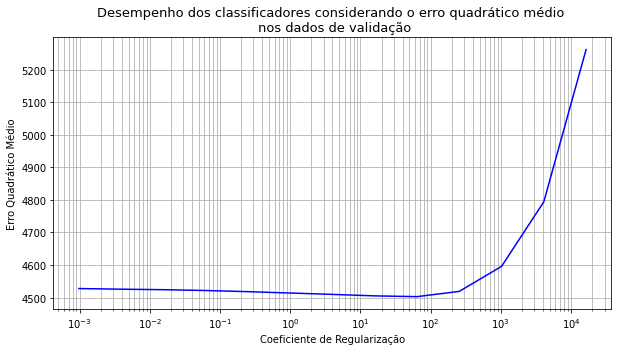

In [20]:
plt.figure(figsize=(10,5))
plt.semilogx(coefs[0:13], ms_errors1[0:13], color='b')
plt.grid(True, which="both")
plt.xticks()
plt.title('Desempenho dos classificadores considerando o erro quadrático médio \n nos dados de validação', fontsize=13)
plt.xlabel('Coeficiente de Regularização')
plt.ylabel('Erro Quadrático Médio')
plt.show()

- Gráfico semilog do desempenho dos classificadores junto aos dados de validação consideranda taxa de erro de classificação:
  - Pode-se observar no gráfico abaixo que o classificador linear com menor taxa de erro de classificação junto aos dados de validação é aquele cujo coeficiente de regularização está no intervalo [800, 1200].

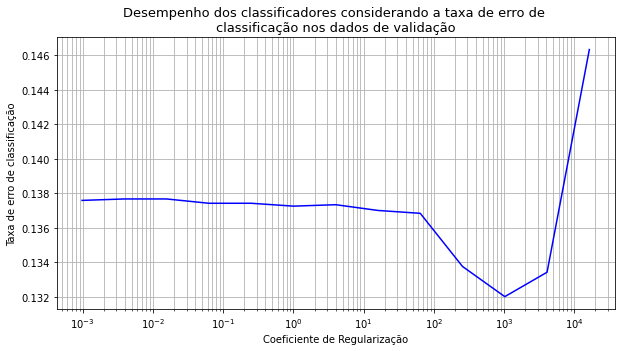

In [21]:
plt.figure(figsize=(10,5))
plt.semilogx(coefs[0:13], ce_errors1[0:13], color='b')
plt.grid(True, which="both")
plt.title('Desempenho dos classificadores considerando a taxa de erro de \nclassificação nos dados de validação', fontsize=13)
plt.xlabel('Coeficiente de Regularização')
plt.ylabel('Taxa de erro de classificação')
plt.show()

### **7. Busca refinada pelos melhores coeficientes de regularização**

##### **7.1. Busca refinada pelo melhor coeficiente de regularização considerando o erro quadrático médio junto aos dados de validação**
- Treinamento e validação do modelo para 200 valores de $\lambda$ no intervalo $[10, 100]$ linearmente espaçados:

In [ ]:
coefs = np.linspace(10, 111, num=200)

ms_errors = np.array([]) # Armazena o erro quadrático médio para cada coeficiente de regularização

for coef in coefs:
    classifier.fit(coef) # treinamento
    Y_est_valid, Y_est_valid_onehot = classifier.evaluate(X_valid, y_valid) # validação
    
    desempenho = Metrics(y_valid, Y_est_valid, Y_est_valid_onehot)
    ms_errors = np.append(ms_errors, desempenho.meansquared_error())
    print('MSE: %.4f -- Coeficiente: %4.4f' % (ms_errors[-1], coef))
    
coef_best_MSE.append(coefs[np.argmin(ms_errors)])

- Melhor coeficiente de regularização obtido:

In [23]:
ms_errors2 = ms_errors.copy()

print(f'Coeficiente de regularização para o menor erro quadrático médio: {coef_best_MSE[-1]}')

Coeficiente de regularização para o menor erro quadrático médio: 51.618090452261306


- Gráfico semilog do desempenho dos classificadores junto aos dados de validação considerando o erro quadrático médio:

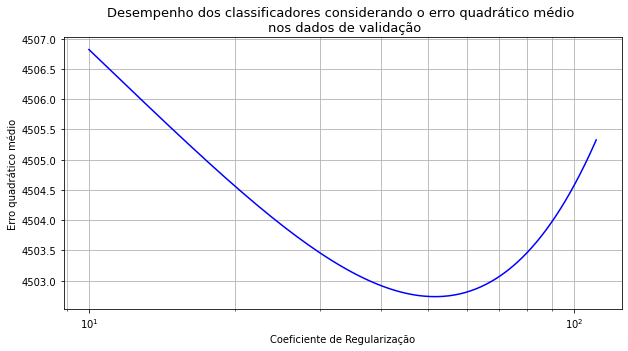

In [24]:
plt.figure(figsize=(10,5))
plt.semilogx(coefs, ms_errors2, color='b')
plt.grid(True, which="both")
plt.title('Desempenho dos classificadores considerando o erro quadrático médio \n nos dados de validação', fontsize=13)
plt.xlabel('Coeficiente de Regularização')
plt.ylabel('Erro quadrático médio')
plt.show()

##### **7.2. Busca refinada pelo melhor coeficiente de regularização considerando o erro de classificação**
- Treinamento e validação do modelo para 200 valores de $\lambda$ linearmente espaçados no intervalo $[800,1200]$: 

In [ ]:
coefs = np.linspace(800, 1201, num=200)

ce_errors = [] # Armazena o erro de classificação para cada coeficiente de regularização

for coef in coefs:
    classifier.fit(coef) # treinamento
    Y_est_valid, Y_est_valid_onehot = classifier.evaluate(X_valid, y_valid) # validação
    
    desempenho = Metrics(y_valid, Y_est_valid, Y_est_valid_onehot)
    ce_errors.append(desempenho.classification_error())
    print('Taxa de Erro: %.4f -- Coeficiente: %.4f' % (ce_errors[-1], coef))

coef_best_CE.append(coefs[np.argmin(ce_errors)])

- Melhor coeficiente de regularização obtido:

In [26]:
ce_errors2 = ce_errors.copy()

print(f'Coeficiente de regularização para o menor erro de classificação: {coef_best_CE[-1]}')

Coeficiente de regularização para o menor erro de classificação: 1166.7437185929648


- Gráfico semilog do desempenho dos classificadores junto aos dados de validação consideranda taxa de erro de classificação:

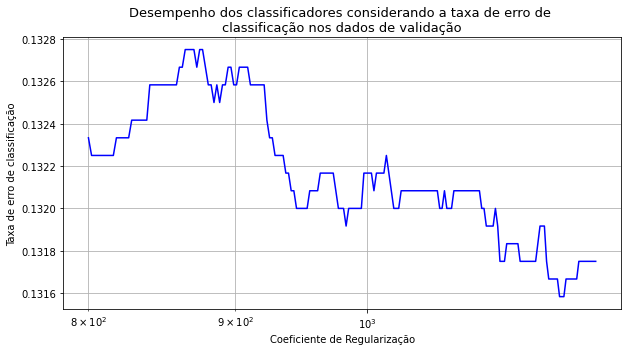

In [27]:
plt.figure(figsize=(10,5))
plt.semilogx(coefs, ce_errors2, color='b')
plt.grid(True, which="both")
plt.title('Desempenho dos classificadores considerando a taxa de erro de \nclassificação nos dados de validação', fontsize=13)
plt.xlabel('Coeficiente de Regularização')
plt.ylabel('Taxa de erro de classificação')
plt.show()

### **8. Etapa de teste do melhor classificador linear obtido após o treinamento**


##### **8.1. Treinamento do modelo com todas as 60.000 amostras de treinamento:**

In [28]:
best_coef = coef_best_CE[-1]

best_classifier = LinearClassifier(X_train, y_train)
best_classifier.fit(best_coef)

##### **8.2. Teste do modelo com as 10.000 amostras de teste:**

In [29]:
Y_est_test, Y_est_test_onehot = best_classifier.predict(X_test, y_test)

desempenho = Metrics(y_test, Y_est_test, Y_est_test_onehot)

ms_error = desempenho.meansquared_error()
ce_error = desempenho.classification_error()

print(f'Erro quadrático médio (MSE): {ms_error}')
print(f'Taxa de erro de classificação: {ce_error}')

Erro quadrático médio (MSE): 3906.643125836314
Taxa de erro de classificação: 0.1346


##### **8.3. Matriz de Confusão**
- Abaixo está apresentada a matriz de confusão do melhor classificador linear obtido durante o treinamento.
- O modelo linear:
  - Teve melhor desempenho para classificar as amostras da classe 1 e pior desempenho para classificar as amostras da classe 5 (Análise feita na diagonal principal).
  - Classificou incorretamente um maior número de amostras da classe 2 como 1, da classe 4 como 9, da classe 5 como 3, da classe 8 como 1 e da classe 9 como 4 e 7 (Análise feita nas colunas da matriz de confusão).

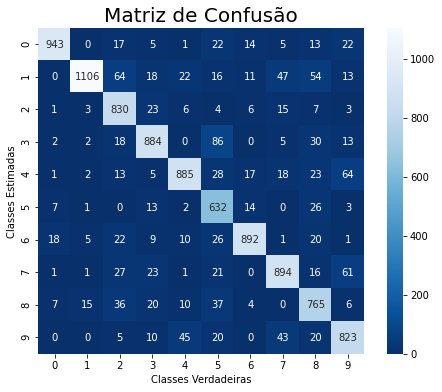

In [30]:
Y_est_test_categorical = onehot_to_categorical(Y_est_test_onehot)

index = [i for i in "0123456789"]
plt.figure(figsize=(8, 6))

sns.heatmap(confusion_matrix(yt, Y_est_test_categorical, 10), annot=True, annot_kws={'size': 10}, square=True, fmt='d', xticklabels=index, yticklabels=index, cmap='Blues_r');
plt.title('Matriz de Confusão', fontsize=20);
plt.xlabel('Classes Verdadeiras');
plt.ylabel('Classes Estimadas');

##### **8.4. Matriz de parâmetros do classificador linear:**

- Cada coluna da matriz é um classificador linear referente a uma das 10 classes do problema.
- Cada classificador tem 785 parâmetros, sendo que um deles é o termo de bias. Os demais combinam linearmente os pixels dos vetores de entrada.

In [31]:
W = best_classifier.W
print(W.shape)

(785, 10)


##### **8.5. Gráficos de calor dos parâmetros de cada um dos 10 classificadores lineares:**
- A figura abaixo apresenta os mapas de calor de cada um dos classificadores lineares (um para cada classe) produzidos. Esses mapas foram gerados tomando cada uma das colunas da matriz de parâmetros W do modelo (eliminando o primeiro elemento, pois este é referente ao termo de bias).
- Pode-se observar que a ativação dos parâmetros de cada um dos classificadores apresenta uma distribuição ou comportamento semelhante ao formato dos dígitos a serem classificados. Isso é bem evidente nos mapas de calor referentes as classes 0, 1, 2, 3, 6 e 8.

In [32]:
classifiers_parameters = np.transpose(np.delete(W, 0, axis=0))
classifiers_labels = list(range(10))

print(classifiers_parameters.shape)
print(classifiers_labels)

(10, 784)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


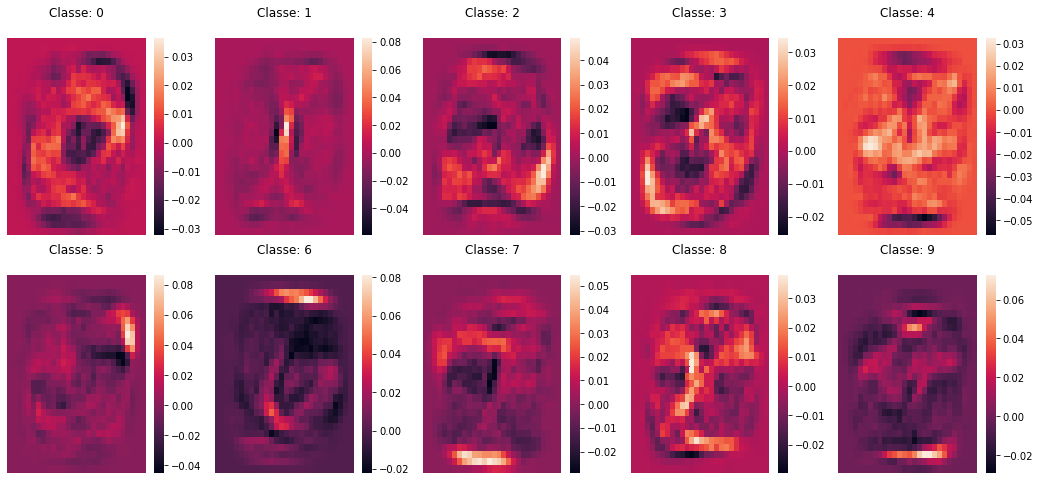

In [39]:
plt.figure(figsize=(18, 8))

for index, (w_vec, label) in enumerate(zip(classifiers_parameters, classifiers_labels)):
    plt.subplot(2, 5, index + 1)
    W_image = np.reshape(w_vec, (28, 28))
    sns.heatmap(W_image)
    plt.axis('off')
    plt.title('Classe: ' + f'{label}\n', fontsize = 12)

##### **8.6. Exemplos de dígitos classificados incorretamente:**

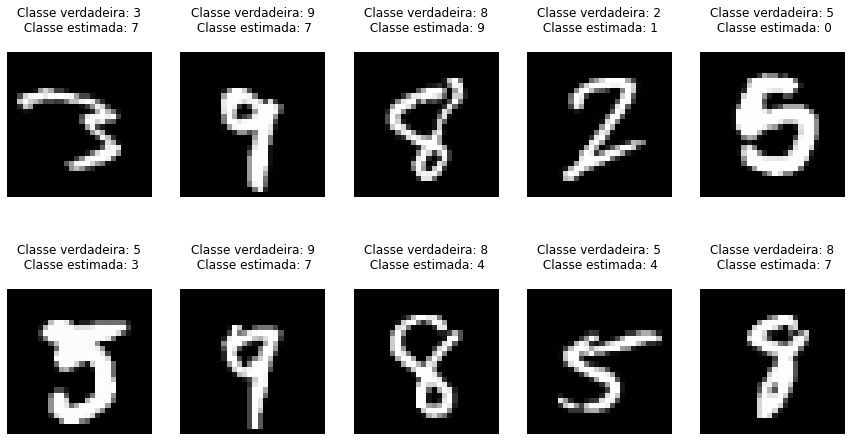

In [40]:
estErr = np.array([1 if imagem != 0 else 0 for imagem in yt - Y_est_test_categorical])
indices = list(np.where(estErr == 1)[0])

plt.figure(figsize=(15,8))

N = 50

for index_subplot, index_amostra in enumerate(indices[N:N+10]):
    plt.subplot(2, 5, index_subplot+1)
    X_image = np.reshape(X_test[index_amostra], (28, 28))
    plt.imshow(X_image, cmap='gray')
    plt.axis('off')
    plt.title(f'Classe verdadeira: {yt[index_amostra]}\n Classe estimada: {Y_est_test_categorical[index_amostra]}\n')